<a href="https://colab.research.google.com/github/j0k3rD/Artificial-Intelligence/blob/main/tp2_aaronmoya_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!wget https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv

--2023-09-18 17:12:34--  https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54288 (53K) [text/plain]
Saving to: ‘insurance.csv.1’

insurance.csv.1     100%[===================>]  53.02K  --.-KB/s    in 0.004s  

2023-09-18 17:12:34 (13.6 MB/s) - ‘insurance.csv.1’ saved [54288/54288]



In [4]:
import pandas as pd

In [5]:
data = pd.read_csv('insurance.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Regresion Multiple

In [8]:
# A veces es mejor como buena práctica tener todos los importes antes del código
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics as ms
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
sns.set()

In [9]:
data.head(5) #visualizamos los primeros 5 registros

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 1. Analizamos cuales son las variables más relacionadas para trabajar

<ipython-input-10-591d38ee1404>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap='coolwarm', annot=True)


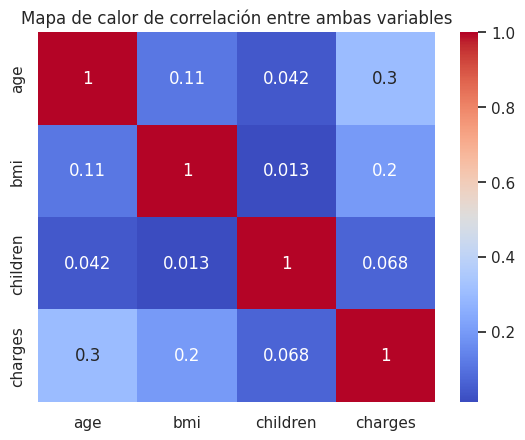

In [10]:
sns.heatmap(data.corr(), cmap='coolwarm', annot=True)
plt.title("Mapa de calor de correlación entre ambas variables");

*Observacion: Como se muestra hay mas relacion entre las variables de age y bmi con la de charges (es muy poca igualmente). Por lo tanto esas son las que usaremos.
Pero para asegurarnos hacemos un análisis más...*

## 1.1 Calculamos PPS con respecto a *Charges*

In [11]:
pip install ppscore

  Preparing metadata (setup.py) ... done
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13165 sha256=8dd9198975133631107efa180bff21005868f425cf83154590a8df93df3be095
  Stored in directory: /root/.cache/pip/wheels/42/87/10/00056aa2d2624f1b9374db6a0d5245da9a3d87bdc9247c1a56
Successfully built ppscore


In [12]:
import ppscore as pps

In [13]:
# Calculamos el poder predictivo de todas las variables con respecto a Charges.
pps.predictors(data, "charges")

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,smoker,charges,0.321869,regression,True,mean absolute error,8351.039631,5663.102519,DecisionTreeRegressor()
1,age,charges,0.000000,regression,True,mean absolute error,8351.039631,9018.550941,DecisionTreeRegressor()
2,sex,charges,0.000000,regression,True,mean absolute error,8351.039631,9100.155021,DecisionTreeRegressor()
3,bmi,charges,0.000000,regression,True,mean absolute error,8351.039631,11220.101797,DecisionTreeRegressor()
4,children,charges,0.000000,regression,True,mean absolute error,8351.039631,9109.068188,DecisionTreeRegressor()
5,region,charges,0.000000,regression,True,mean absolute error,8351.039631,9074.956661,DecisionTreeRegressor()


*Como vemos solamente 'smoker' tiene algo de PPS, por lo cual hay que tratar esa variable cualitativa para  poder usarla en el modelo de regresion.*

## 1.2 Tratamos 'smoker' con OneHotEncoder

In [14]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

In [15]:
data.drop(columns=['sex','region'], inplace=True)

In [16]:
X = data.iloc[:,:].values

In [17]:
Z = pd.DataFrame(X)

In [18]:
print(Z)

       0       1  2    3            4
0     19    27.9  0  yes    16884.924
1     18   33.77  1   no    1725.5523
2     28    33.0  3   no     4449.462
3     33  22.705  0   no  21984.47061
4     32   28.88  0   no    3866.8552
...   ..     ... ..  ...          ...
1333  50   30.97  3   no   10600.5483
1334  18   31.92  0   no    2205.9808
1335  18   36.85  0   no    1629.8335
1336  21    25.8  0   no     2007.945
1337  61   29.07  0  yes   29141.3603

[1338 rows x 5 columns]


### Tomamos la columna 3 ya que son los valores de smoke que vamos a usar.

In [19]:
labelencoder_X = LabelEncoder()

In [20]:
X[:,3] = labelencoder_X.fit_transform(X[:,3])

In [21]:
print(Z)

       0       1  2  3            4
0     19    27.9  0  1    16884.924
1     18   33.77  1  0    1725.5523
2     28    33.0  3  0     4449.462
3     33  22.705  0  0  21984.47061
4     32   28.88  0  0    3866.8552
...   ..     ... .. ..          ...
1333  50   30.97  3  0   10600.5483
1334  18   31.92  0  0    2205.9808
1335  18   36.85  0  0    1629.8335
1336  21    25.8  0  0     2007.945
1337  61   29.07  0  1   29141.3603

[1338 rows x 5 columns]


In [22]:
# Usamos
# ct = ColumnTransformer([("smoker", OneHotEncoder(), [3])], remainder = 'passthrough')

In [23]:
# X_transformed = ct.fit_transform(X)

In [24]:
# print(X_transformed)

## 2. Elegimos las variables

In [25]:
# Elegimos 0(age),1(bmi),3(smoker) y 4(changes)
X = Z[[0,1,3]].to_numpy()
y = Z[4].to_numpy()

In [26]:
# Observamos 5 ejemplos de los datos en X e y
# También observamos el formato y la cantidad de datos que hay en cada variable
print(f"X ('age','bmi', 'smoker') tiene la forma: {X.shape} | posee cantidad de datos: {len(X)}\nAlgunos ejemplos se ven así:\n{X[:5]}")
print(f"\nY ('changes') tiene la forma: {y.shape} | posee cantidad de datos: {len(y)}\n5 ejemplos se ven así: {y[:5]}")

X ('age','bmi', 'smoker') tiene la forma: (1338, 3) | posee cantidad de datos: 1338
Algunos ejemplos se ven así:
[[19 27.9 1]
 [18 33.77 0]
 [28 33.0 0]
 [33 22.705 0]
 [32 28.88 0]]

Y ('changes') tiene la forma: (1338,) | posee cantidad de datos: 1338
5 ejemplos se ven así: [16884.924 1725.5523 4449.462 21984.47061 3866.8552]


## 3. Analizamos el dataset

Para esto analizaremos las siguientes características:

1. Normalidad de los datos.
2. Como se distribuyen.
3. Correlación

In [27]:
# Normalidad la calculamos usando el test de Shapiro-Wilk
normalidad_X_age = shapiro(X[:,0])
normalidad_X_bmi = shapiro(X[:,1])
normalidad_X_smoker = shapiro(X[:,2])

normalidad_y = shapiro(y)

print(f"Normalidad de X_age: {normalidad_X_age}")
print(f"Normalidad de X_bmi: {normalidad_X_bmi}")
print(f"Normalidad de X_smoker: {normalidad_X_smoker}")

print(f"Normalidad de y: {normalidad_y}")

Normalidad de X_age: ShapiroResult(statistic=0.9446989893913269, pvalue=5.687060076887153e-22)
Normalidad de X_bmi: ShapiroResult(statistic=0.9938861727714539, pvalue=2.6033414542325772e-05)
Normalidad de X_smoker: ShapiroResult(statistic=0.4950329065322876, pvalue=0.0)
Normalidad de y: ShapiroResult(statistic=0.8146880865097046, pvalue=1.1505194006561963e-36)


>**Nota:** vemos que para ambos conjuntos de datos X e y, el p-value es < 0.05 por lo cual se rechaza la hipotesis nula (H0) de que se distribuyen de forma normal. Habría que analizar que "otra forma de distribución pueden tener". Esto se los dejo para que vean como la estadística es importante. Al saber que no se distribuyen de forma normal no se puede hacer un teste de correlación de Pearson, pero si tal vez de Kendall...


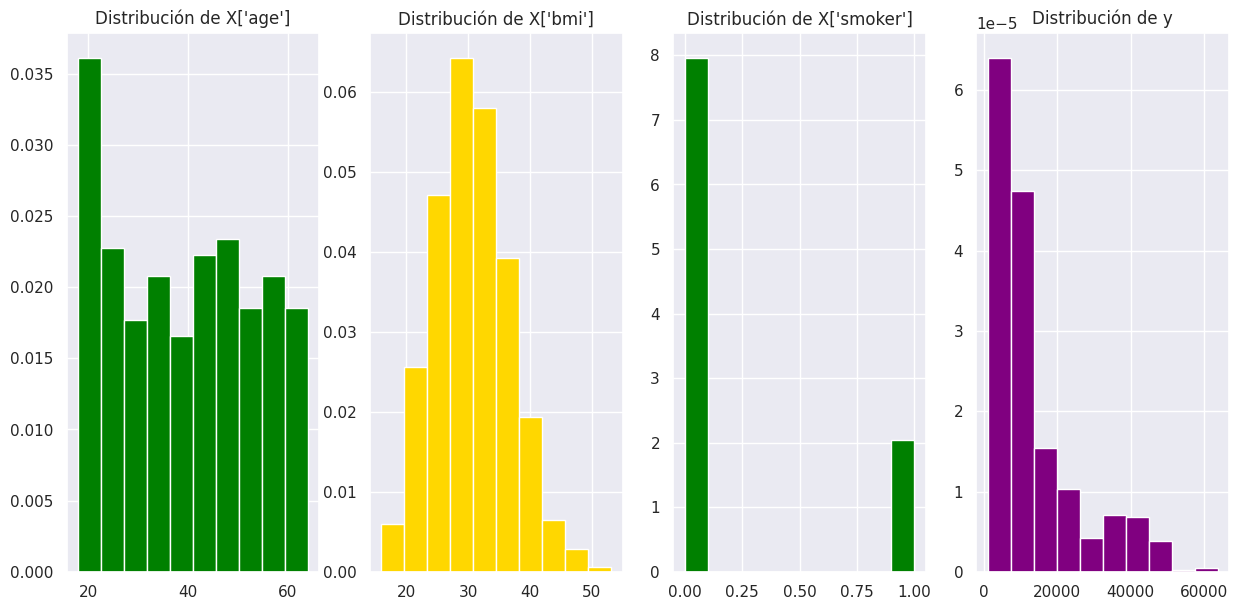

In [28]:
#Vemos como se distribuyen ambos conjuntos de datos X e Y
plt.figure(figsize=(15,7))
plt.subplot(1,4,1)
plt.hist(X[:,0],color='green',density=True)
plt.title("Distribución de X['age']")
plt.subplot(1,4,2)
plt.hist(X[:,1],color='gold',density=True)
plt.title("Distribución de X['bmi']")
plt.subplot(1,4,3)
plt.hist(X[:,2],color='green',density=True)
plt.title("Distribución de X['smoker']")
plt.subplot(1,4,4)
plt.hist(y,color='purple',density=True)
plt.title("Distribución de y");

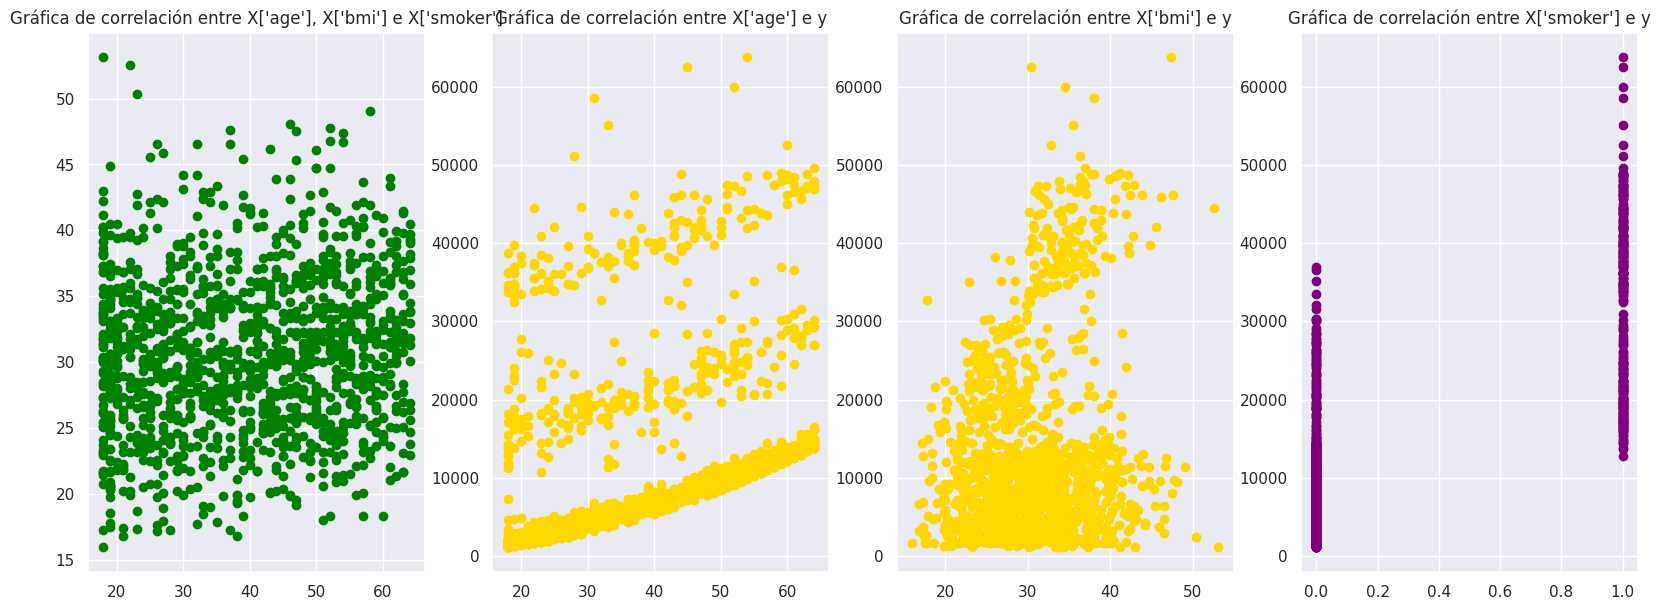

In [29]:
#Vemos si se correlacionan
#Hacemos primero un scatterplot
plt.figure(figsize=(20,7))
plt.subplot(1,4,1)
plt.scatter(X[:,0],X[:,1],color='green')
plt.title("Gráfica de correlación entre X['age'], X['bmi'] e X['smoker']")
plt.subplot(1,4,2)
plt.scatter(X[:,0],y,color='gold')
plt.title("Gráfica de correlación entre X['age'] e y")
plt.subplot(1,4,3)
plt.scatter(X[:,1],y,color='gold')
plt.title("Gráfica de correlación entre X['bmi'] e y")
plt.subplot(1,4,4)
plt.scatter(X[:,2],y,color='purple')
plt.title("Gráfica de correlación entre X['smoker'] e y");

## COMO GRAFICAR LAS 3??


## 4. Transformamos los datos

In [30]:
# En lo particular, elegí hacerlo con MinMaxScaler. Transforma todos los datos a la misma escala.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [31]:
X.shape

(1338, 3)

In [32]:
#ploteamos como se ven 5 ejemplos de datos normales vs escalados. ESTO ESTA BUENO PARA REDES NEURONALES.
print(f"X original: {X[:5]}\n")
# print(f"X transformed: {X_transformed[:5]}")

X original: [[19 27.9 1]
 [18 33.77 0]
 [28 33.0 0]
 [33 22.705 0]
 [32 28.88 0]]



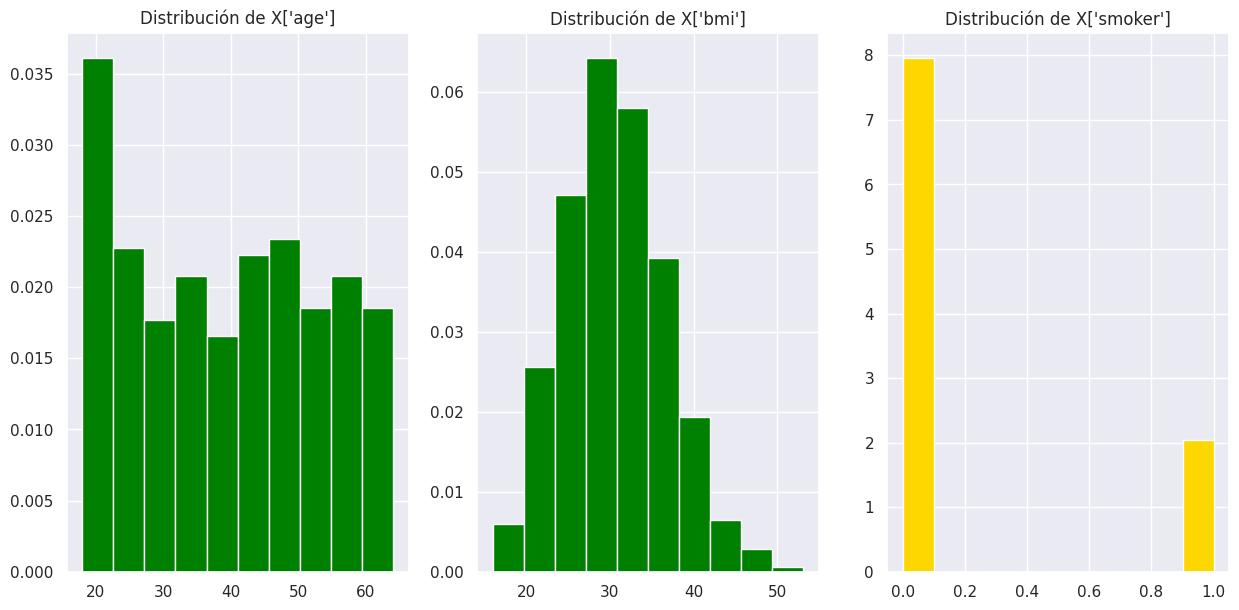

In [33]:
#Vemos como se distribuyen los valores de X_transformed
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.hist(X[:,0],color='green',density=True)
plt.title("Distribución de X['age']")
plt.subplot(1,3,2)
plt.hist(X[:,1],color='green',density=True)
plt.title("Distribución de X['bmi']")
plt.subplot(1,3,3)
plt.hist(X[:,2],color='gold',density=True)
plt.title("Distribución de X['smoker']");

## 5. Separamos el dataset transformado en entrenamiento y testeo

In [34]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

In [35]:
#Vemos las especificaciones de cada conjunto de datos formados
print(f"Xtrain shape: {Xtrain.shape} | ytrain shape {ytrain.shape}")
print(f"Xtest shape: {Xtest.shape} | ytest shape {ytest.shape}")

Xtrain shape: (1003, 3) | ytrain shape (1003,)
Xtest shape: (335, 3) | ytest shape (335,)


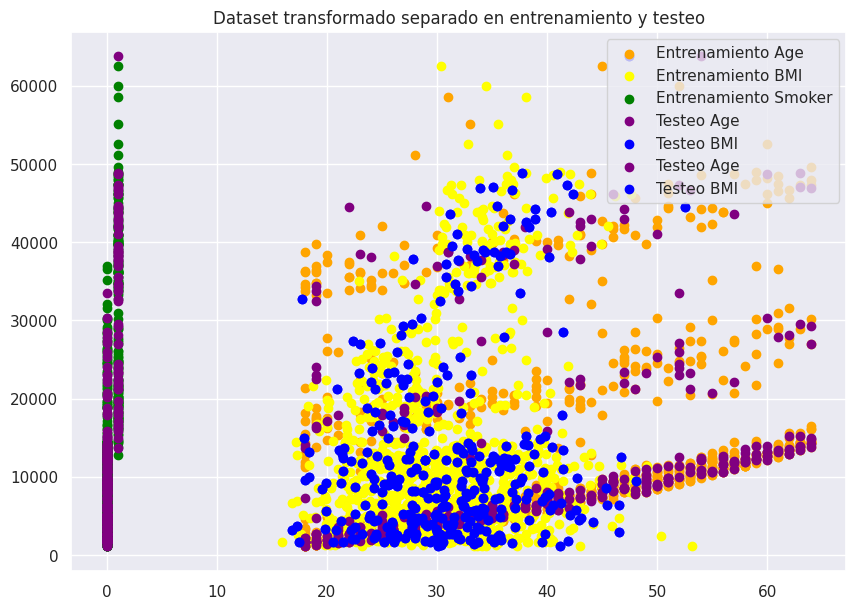

In [36]:
# Vemos gráficamente como queda el dataset transformador separado en entrenamiento y testeo
plt.figure(figsize=(10,7))
plt.scatter(Xtrain[:,0],ytrain,c='orange',label='Entrenamiento Age')
plt.scatter(Xtrain[:,1],ytrain,c='yellow',label='Entrenamiento BMI')
plt.scatter(Xtrain[:,2],ytrain,c='green',label='Entrenamiento Smoker')

plt.scatter(Xtest[:,0],ytest,c='purple',label='Testeo Age')
plt.scatter(Xtest[:,1],ytest,c='blue',label='Testeo BMI')

plt.scatter(Xtest[:,2],ytest,c='purple',label='Testeo Age')
plt.scatter(Xtest[:,1],ytest,c='blue',label='Testeo BMI')
plt.legend()
plt.title("Dataset transformado separado en entrenamiento y testeo");

## 6. Entrenamos el modelo de regresión simple

In [37]:
# Instanciamos el modelo
multilinear_model = LinearRegression()

In [38]:
multilinear_model.fit(Xtrain,ytrain)

LinearRegression()

In [39]:
#Vemos los coefficientes que "aprendió" o "encontró" el modelo que mejor se ajustan a la relación multiple
print(f"Coeficiente que acompañan a las variables de entrada: {multilinear_model.coef_}")
print(f"Intercepto que corta al eje de ordenadas: {multilinear_model.intercept_}")

Coeficiente que acompañan a las variables de entrada: [  262.14496138   326.72519955 23668.49744603]
Intercepto que corta al eje de ordenadas: -11852.72045231963


## 7. Evaluamos el modelo lineal

In [40]:
#Ahora miramos el R2 usando la función score del modelo entrenado
print(f"Valor de métrica R2 con el conjunto de entrenamiento: {multilinear_model.score(Xtrain,ytrain)}")
print(f"Valor de métrica R2 con el conjunto de testeo: {multilinear_model.score(Xtest,ytest)}")

Valor de métrica R2 con el conjunto de entrenamiento: 0.7422732113805752
Valor de métrica R2 con el conjunto de testeo: 0.7622843807642006


In [41]:
#Calculamos predicciones para el conjunto de testeo y entrenamiento con la función .predict()
y_test_m_pred = multilinear_model.predict(Xtest)
y_train_m_pred = multilinear_model.predict(Xtrain)
y_test_m_pred.shape, y_train_m_pred.shape

((335,), (1003,))

In [42]:
#Comparamos los valores predichos vs originales del conjunto de testeo y entrenamiento
from sklearn import metrics as ms
test_mae = ms.mean_absolute_error(y_true = ytest, y_pred = y_test_m_pred) #Calculamos el mae entre ytest vs y_test_pred
train_mae = ms.mean_absolute_error(y_true = ytrain, y_pred = y_train_m_pred) #Calculamos el mae entre ytrain vs y_train_pred
test_mse = ms.mean_squared_error(y_true = ytest, y_pred = y_test_m_pred) #Calculamos el mse entre ytest vs y_test_pred
train_mse = ms.mean_squared_error(y_true = ytrain, y_pred = y_train_m_pred) #Calculamos el mse entre ytrain vs y_train_pred
print(f"Valor de métrica MAE con el conjunto de testeo: {test_mae}")
print(f"Valor de métrica MAE con el conjunto de entrenamiento: {train_mae}\n")
print(f"Valor de métrica MSE con el conjunto de testeo: {test_mse}")
print(f"Valor de métrica MSE con el conjunto de entrenamiento: {train_mse}")

Valor de métrica MAE con el conjunto de testeo: 4301.327214279143
Valor de métrica MAE con el conjunto de entrenamiento: 4220.1549048289335

Valor de métrica MSE con el conjunto de testeo: 35869180.7120661
Valor de métrica MSE con el conjunto de entrenamiento: 37393681.25850414


In [43]:
# Como sabemos que los valores estan bien, para eso podemos ver cual es el valor promedio, maximo y minimo de conjunto de datos
print(f"Charges maximo: {y.max()} | Charges minimo: {y.min()} | Charges promedio: {y.mean()} | Varianza de los datos de entrada X: {X.var()}")

Charges maximo: 63770.42801 | Charges minimo: 1121.8739 | Charges promedio: 13270.422265141257 | Varianza de los datos de entrada X: 358.4028879354383


In [44]:
# Vemos los datos de precios predecidos cuanto varían con relación a los originales para darnos un sentido de la magnitud del error
error = [] #creamos una lista para guardar todos los datos obtenidos en el bucle for
for i,j in zip(ytest,y_test_m_pred):
  print(f"{i} vs {j:.2f} --> diferencia = {(i-j):.2f} --> error: {(int(i-j)/i)*100:.2f}%")
  error.append(abs((int(i-j)/i)*100))

9095.06825 vs 8169.11 --> diferencia = 925.96 --> error: 10.17%
5272.1758 vs 7392.79 --> diferencia = -2120.61 --> error: -40.21%
29330.98315 vs 37377.06 --> diferencia = -8046.08 --> error: -27.43%
9301.89355 vs 8617.49 --> diferencia = 684.41 --> error: 7.35%
33750.2918 vs 27225.60 --> diferencia = 6524.69 --> error: 19.33%
4536.259 vs 11076.72 --> diferencia = -6540.46 --> error: -144.17%
2117.33885 vs 484.25 --> diferencia = 1633.09 --> error: 77.13%
14210.53595 vs 17309.08 --> diferencia = -3098.54 --> error: -21.80%
3732.6251 vs 1136.42 --> diferencia = 2596.21 --> error: 69.55%
10264.4421 vs 10366.13 --> diferencia = -101.69 --> error: -0.98%
18259.216 vs 27652.22 --> diferencia = -9393.00 --> error: -51.44%
7256.7231 vs 8889.75 --> diferencia = -1633.02 --> error: -22.50%
3947.4131 vs 5417.28 --> diferencia = -1469.87 --> error: -37.21%
46151.1245 vs 37711.26 --> diferencia = 8439.87 --> error: 18.29%
48673.5588 vs 40914.07 --> diferencia = 7759.49 --> error: 15.94%
44202.6536 

In [45]:
print(f"El error promedio de las predicciones con el conjunto de testeo es: {sum(error)/len(error):.2f}%")

El error promedio de las predicciones con el conjunto de testeo es: 46.54%


---

## Modelo de regresión con SVR

In [46]:
from sklearn.svm import SVR

In [92]:
print(Z)

       0       1  2  3            4
0     19    27.9  0  1    16884.924
1     18   33.77  1  0    1725.5523
2     28    33.0  3  0     4449.462
3     33  22.705  0  0  21984.47061
4     32   28.88  0  0    3866.8552
...   ..     ... .. ..          ...
1333  50   30.97  3  0   10600.5483
1334  18   31.92  0  0    2205.9808
1335  18   36.85  0  0    1629.8335
1336  21    25.8  0  0     2007.945
1337  61   29.07  0  1   29141.3603

[1338 rows x 5 columns]


In [105]:
columns_name = {0: 'age',
                1: 'bmi',
                3: 'smoker',
                4: 'charges'}

In [106]:
Z.rename(columns=columns_name, inplace=True)

In [107]:
print(Z)

     age     bmi  2 smoker      charges
0     19    27.9  0      1    16884.924
1     18   33.77  1      0    1725.5523
2     28    33.0  3      0     4449.462
3     33  22.705  0      0  21984.47061
4     32   28.88  0      0    3866.8552
...   ..     ... ..    ...          ...
1333  50   30.97  3      0   10600.5483
1334  18   31.92  0      0    2205.9808
1335  18   36.85  0      0    1629.8335
1336  21    25.8  0      0     2007.945
1337  61   29.07  0      1   29141.3603

[1338 rows x 5 columns]


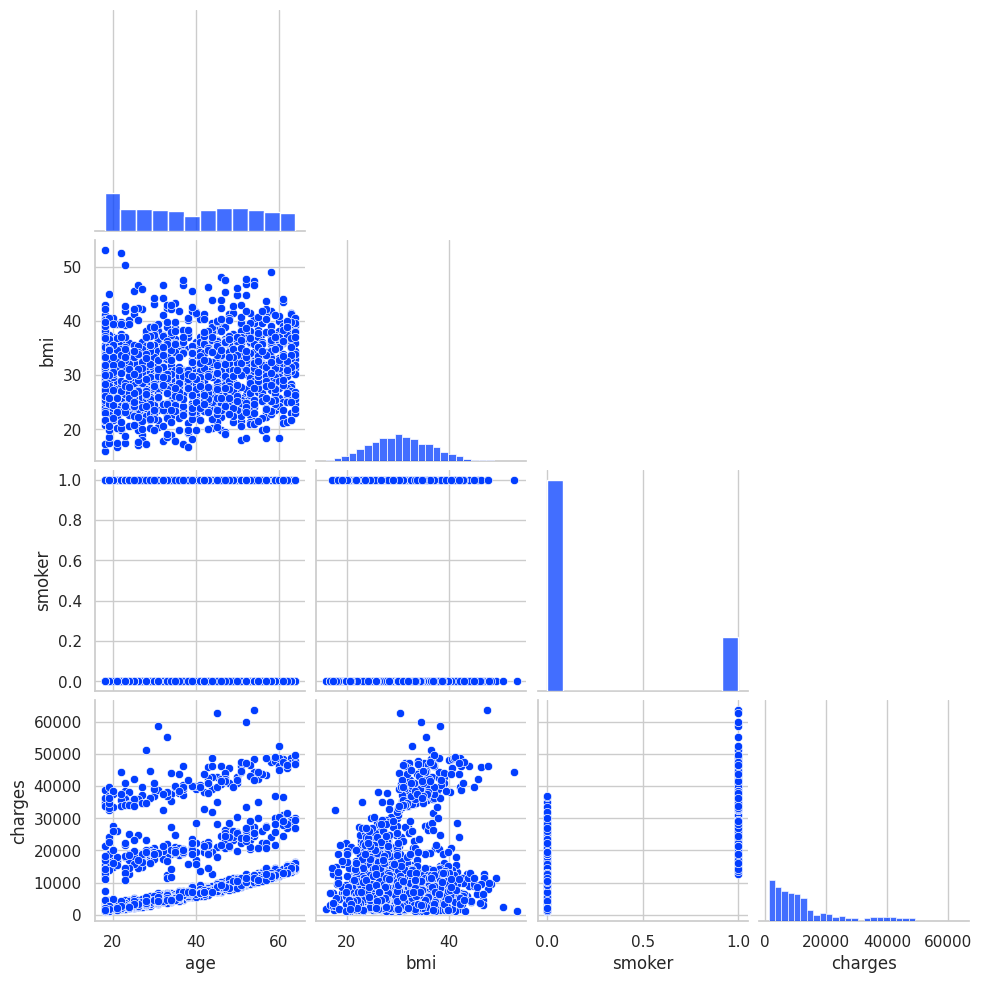

In [108]:
sns.pairplot(Z.drop(columns=2), corner=True);

In [143]:
from sklearn.svm import SVR

for i in [0.01, 1, 10, 100, 1000]:
    # Creamos modelo SVR con kernel lineal
    lin_svr = SVR(kernel='linear', C=i)
    lin_svr.fit(X, y)

    # Creamos modelo SVR con kernel polinomial
    poly_svr = SVR(kernel='poly', C=i, degree=2)
    poly_svr.fit(X, y)

    # Creamos modelo SVR con kernel rbf
    rbf_svr = SVR(kernel='rbf', C=i, gamma=0.15)
    rbf_svr.fit(X, y)

    # Calcular y mostrar los puntajes R^2 para los tres modelos juntos con espacio entre líneas
    lin_score = lin_svr.score(X, y)
    poly_score = poly_svr.score(X, y)
    rbf_score = rbf_svr.score(X, y)

    print(f"Para C = {i}\nR2 score (linear) = {lin_score}, R2 score (polynomial) = {poly_score}, R2 score (rbf) = {rbf_score}")
    print('--------------------------------------------------------')


Para C = 0.01
R2 score (linear) = -0.1011678292128384, R2 score (polynomial) = -0.10308103175601446, R2 score (rbf) = -0.1031759657122795
--------------------------------------------------------
Para C = 1
R2 score (linear) = -0.13171372582239016, R2 score (polynomial) = -0.0901683476469326, R2 score (rbf) = -0.10326096436961452
--------------------------------------------------------
Para C = 10
R2 score (linear) = 0.03047360529675014, R2 score (polynomial) = -0.14508327824941047, R2 score (rbf) = -0.1011013988044902
--------------------------------------------------------
Para C = 100
R2 score (linear) = 0.5537133699449953, R2 score (polynomial) = -0.14319991764664763, R2 score (rbf) = -0.08143492996320356
--------------------------------------------------------
Para C = 1000
R2 score (linear) = 0.7169136995536598, R2 score (polynomial) = -0.06828355565620736, R2 score (rbf) = -0.008479200486234406
--------------------------------------------------------


ValueError: ignored

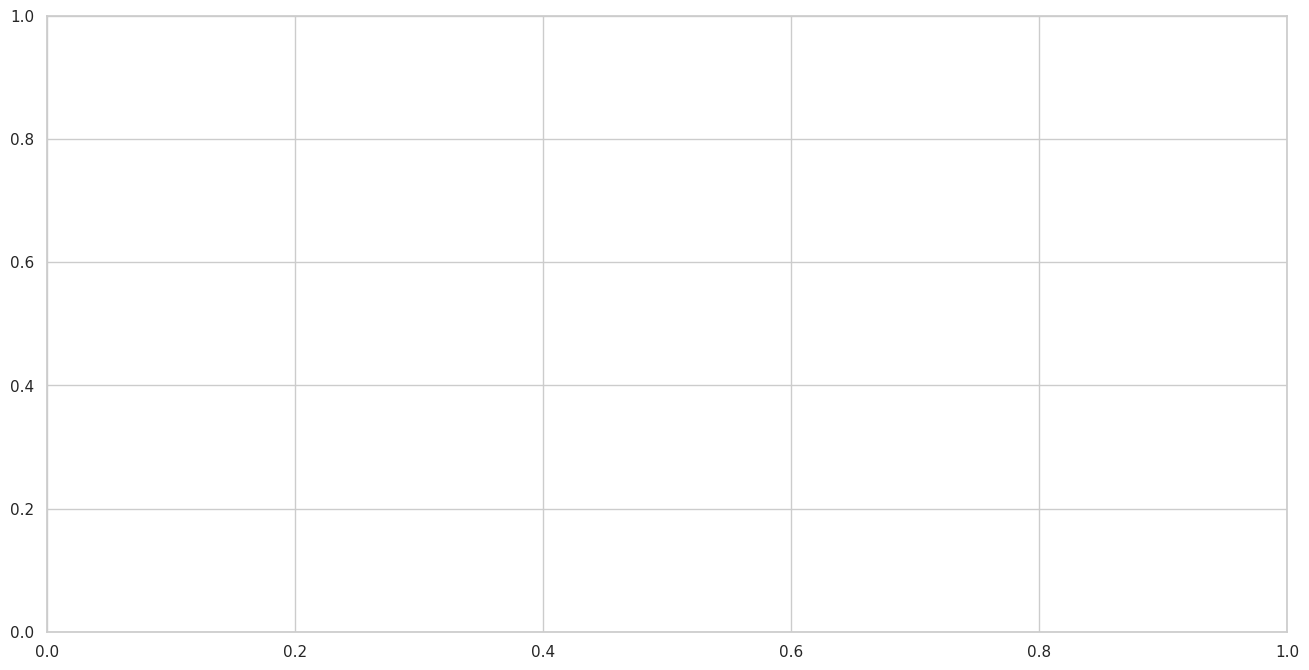

In [146]:
# Valores de X para la gráfica

plt.figure(figsize=(16, 8))
plt.scatter(X, y, color='red', label='Data') #????????
plt.plot(X, lin_svr.predict(X), color='green', label= 'LINEAR MODEL')
plt.plot(X, poly_svr.predict(X), color='orange', label= 'POLY MODEL')
plt.plot(X, rbf_svr.predict(X), color='pink', label= 'RBF MODEL')

plt.legend()
plt.show()